In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !mkdir -p ~/.kaggle
# !cp /content/drive/My\ Drive/API_TOKENS/kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d adamswakhungu/tea-disease-classification


 98% 340M/345M [00:12<00:00, 25.9MB/s]
100% 345M/345M [00:12<00:00, 28.0MB/s]


In [ ]:
# !unzip tea-disease-classification.zip -d data

Archive:  tea-disease-classification.zip
  inflating: data/Anthracnose/IMG_20220503_143242.jpg  
  inflating: data/Anthracnose/IMG_20220503_143328.jpg  
  inflating: data/Anthracnose/IMG_20220503_143336.jpg  
  inflating: data/Anthracnose/IMG_20220503_143344.jpg  
  inflating: data/Anthracnose/IMG_20220503_143401.jpg  
  inflating: data/Anthracnose/IMG_20220503_143424.jpg  
  inflating: data/Anthracnose/IMG_20220503_143433.jpg  
  inflating: data/Anthracnose/IMG_20220503_143451.jpg  
  inflating: data/Anthracnose/IMG_20220503_143501.jpg  
  inflating: data/Anthracnose/IMG_20220503_143525.jpg  
  inflating: data/Anthracnose/IMG_20220503_143604.jpg  
  inflating: data/Anthracnose/IMG_20220503_143613.jpg  
  inflating: data/Anthracnose/IMG_20220503_143639.jpg  
  inflating: data/Anthracnose/IMG_20220503_143647.jpg  
  inflating: data/Anthracnose/IMG_20220503_143709.jpg  
  inflating: data/Anthracnose/IMG_20220503_143725.jpg  
  inflating: data/Anthracnose/IMG_20220503_143740.jpg  
  infla

In [ ]:
import os
import random
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader

# Define paths and class labels
data_dir = "data"  # Replace with your actual data directory
class_names = os.listdir(data_dir)  # Assuming subfolders represent classes

# Set split ratios (adjust as needed)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 1 - train_ratio - val_ratio

# Function to load images and labels
def load_images(data_dir, class_names):
    images, labels = [], []
    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_path):
            image_path = os.path.join(class_path, filename)
            image = Image.open(image_path).convert('RGB')  # Ensure RGB mode
            images.append(image)
            labels.append(class_names.index(class_name))  # Label as class name index
    return images, labels

In [ ]:
# Load data
images, labels = load_images(data_dir, class_names)

In [ ]:
# Split data using random shuffling
random.seed(42)  # Set a seed for reproducibility
data_length = len(images)
indices = list(range(data_length))
random.shuffle(indices)

In [ ]:
train_split = int(train_ratio * data_length)
val_split = train_split + int(val_ratio * data_length)

train_images, train_labels = [images[i] for i in indices[:train_split]], [labels[i] for i in indices[:train_split]]
val_images, val_labels = [images[i] for i in indices[train_split:val_split]], [labels[i] for i in indices[train_split:val_split]]
test_images, test_labels = [images[i] for i in indices[val_split:]], [labels[i] for i in indices[val_split:]]

In [ ]:
# Define transformations
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Adjust size as needed
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize(256),  # Adjust size as needed
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [ ]:
# Create DataLoaders
train_data = [(train_transform(img), label) for img, label in zip(train_images, train_labels)]
val_data = [(val_test_transform(img), label) for img, label in zip(val_images, val_labels)]
test_data = [(val_test_transform(img), label) for img, label in zip(test_images, test_labels)]

train_loader = DataLoader(dataset=train_data, batch_size=4, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=4)
test_loader = DataLoader(dataset=test_data, batch_size=4)


Training Set:


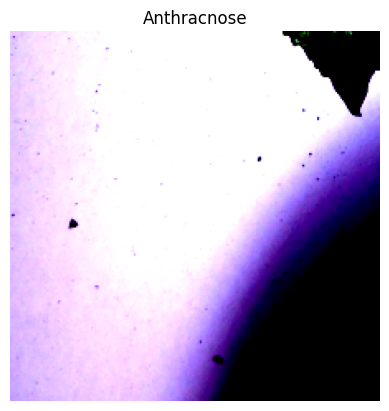

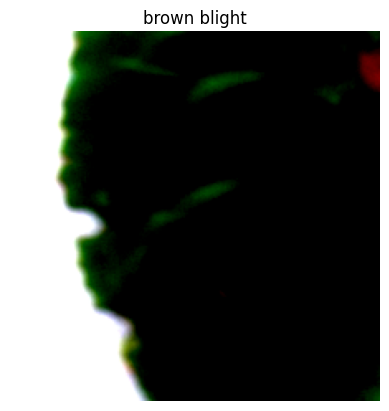

Validation Set:


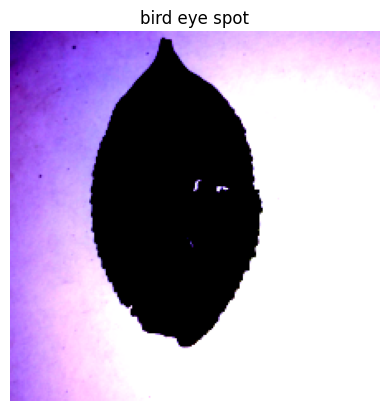

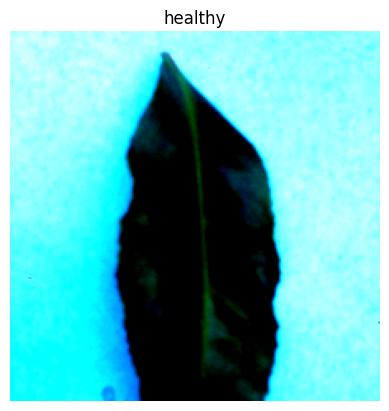

Test Set:


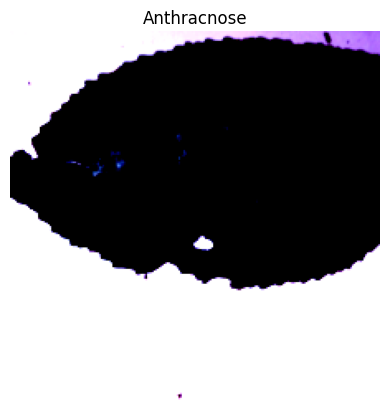

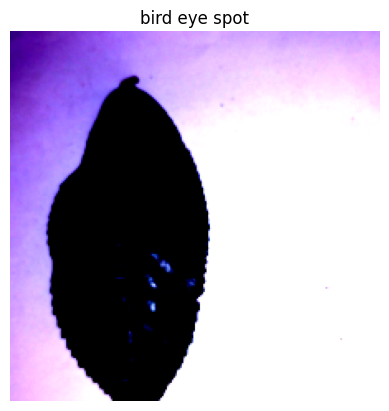

Data splitting and visualization complete!


In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

def visualize_images(data_loader, num_images=2):
    for images, labels in data_loader:
        for i in range(num_images):
            image = images[i].squeeze().cpu().numpy()  # Convert tensor to numpy array
            image = image.transpose((1, 2, 0))  # Convert from CxHxW to HxWxC
            plt.imshow(image)
            plt.title(f"{class_names[labels[i]]}")  # Display class name
            plt.axis('off')
            plt.show()
        break  # Only visualize first batch

# Visualize samples
print("Training Set:")
visualize_images(train_loader)

print("Validation Set:")
visualize_images(val_loader)

print("Test Set:")
visualize_images(test_loader)

print("Data splitting and visualization complete!")


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F

# # Define a simple CNN model
# class CNN(nn.Module):
#     def __init__(self, num_classes=10):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(32 * 56 * 56, 128)  # Adjust input size based on your image size
#         self.fc2 = nn.Linear(128, num_classes)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 56 * 56)  # Adjust input size based on your image size
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F

# # Define a simple CNN model
# class CNN(nn.Module):
#     def __init__(self, num_classes=10):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.fc1 = nn.Linear(32 * 56 * 56, 128)  # Adjust input size based on your image size
#         self.dropout1 = nn.Dropout(0.5)  # Dropout layer after first fully connected layer
#         self.fc2 = nn.Linear(128, num_classes)
#         self.dropout2 = nn.Dropout(0.5)  # Dropout layer after second fully connected layer

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 32 * 56 * 56)  # Adjust input size based on your image size
#         x = F.relu(self.fc1(x))
#         x = self.dropout1(x)  # Applying dropout after the first fully connected layer
#         x = F.relu(self.fc2(x))
#         x = self.dropout2(x)  # Applying dropout after the second fully connected layer
#         return x


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models

# Define a VGG16 model
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.vgg16 = models.vgg16(pretrained=True)
        # Freeze the pre-trained layers
        for param in self.vgg16.parameters():
            param.requires_grad = False
        # Replace the classifier with a new one, excluding the final fully connected layer
        self.vgg16.classifier = nn.Sequential(
            nn.Linear(25088, 4096),  # Adjust input size based on your image size
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        return self.vgg16(x)



In [ ]:
# # Instantiate the model
# model = CNN()

In [ ]:
# Instantiate the VGG16 model
model = VGG16(num_classes=4)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.vgg16.classifier.parameters(), lr=0.001, momentum=0.9)


In [ ]:
# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
num_epochs=10

In [ ]:
# Train the model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        # Print training loss
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

        # Evaluate the model on validation set
        validate_model(model, criterion, val_loader)

# Validate the model
def validate_model(model, criterion, val_loader):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item()

    # Print validation loss and accuracy
    print(f"Validation Loss: {val_loss/len(val_loader)}, Accuracy: {(100 * correct / total):.2f}%")


In [ ]:
# Test the model
def test_model(model, test_loader, class_names, num_images=5):
    model.eval()
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            if i >= num_images:
                break
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            probs = F.softmax(outputs, dim=1)
            for j in range(len(labels)):
                print(f"Actual: {class_names[labels[j]]}, Predicted: {class_names[predicted[j]]}, Probabilities: {probs[j]}")
                # Visualize the image here if needed



In [ ]:
# Train the model
train_model(model, criterion, optimizer, train_loader, val_loader)

Epoch 1/10, Loss: 1.1846976329068668
Validation Loss: 0.6618038937449455, Accuracy: 73.33%
Epoch 2/10, Loss: 0.4619341233714682
Validation Loss: 0.4134439848421607, Accuracy: 80.00%
Epoch 3/10, Loss: 0.15953889782311487
Validation Loss: 0.8699573492849595, Accuracy: 76.67%
Epoch 4/10, Loss: 0.15333162109581294
Validation Loss: 0.4029203729442088, Accuracy: 83.33%
Epoch 5/10, Loss: 0.06270228254658429
Validation Loss: 0.19412708112031396, Accuracy: 90.00%
Epoch 6/10, Loss: 0.03851849157181874
Validation Loss: 0.25446056716828025, Accuracy: 90.00%
Epoch 7/10, Loss: 0.04185845969019641
Validation Loss: 1.2634165065041998, Accuracy: 76.67%
Epoch 8/10, Loss: 0.008357644547731235
Validation Loss: 0.8766179231092792, Accuracy: 80.00%
Epoch 9/10, Loss: 0.015349201595035694
Validation Loss: 0.3042804213996533, Accuracy: 90.00%
Epoch 10/10, Loss: 0.01810760247033494
Validation Loss: 0.33866777311095575, Accuracy: 83.33%


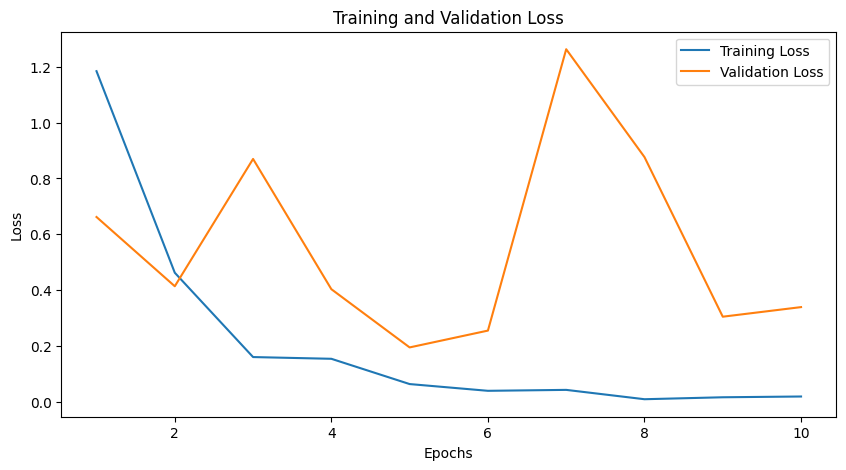

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
epochs = range(1, 11)
train_loss = [1.1846976329068668, 0.4619341233714682, 0.15953889782311487, 0.15333162109581294, 0.06270228254658429,
              0.03851849157181874, 0.04185845969019641, 0.008357644547731235, 0.015349201595035694, 0.01810760247033494]
val_loss = [0.6618038937449455, 0.4134439848421607, 0.8699573492849595, 0.4029203729442088, 0.19412708112031396,
            0.25446056716828025, 1.2634165065041998, 0.8766179231092792, 0.3042804213996533, 0.33866777311095575]
accuracy = [73.33, 80.00, 76.67, 83.33, 90.00, 90.00, 76.67, 80.00, 90.00, 83.33]

# Plotting
plt.figure(figsize=(10, 5))

sns.lineplot(x=epochs, y=train_loss, label='Training Loss')
sns.lineplot(x=epochs, y=val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


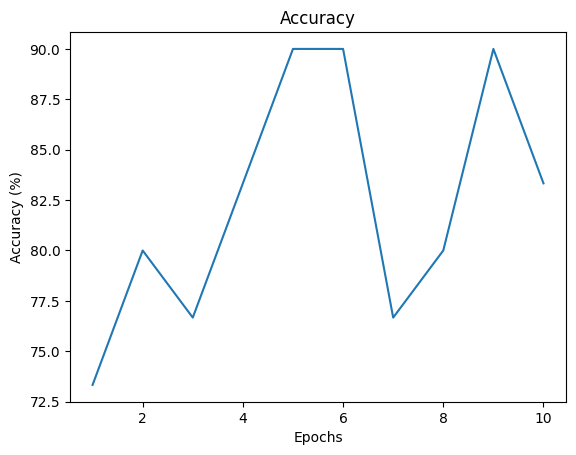

In [ ]:
sns.lineplot(x=epochs, y=accuracy)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.show()


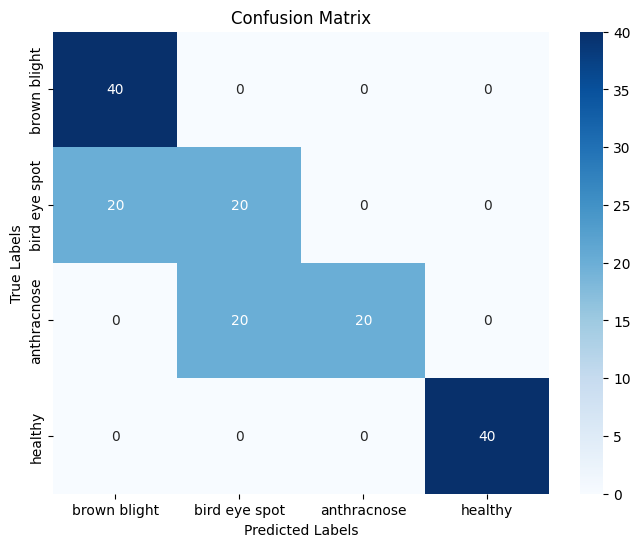

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# True labels and predicted labels (assuming they are available)
true_labels = ["brown blight", "bird eye spot", "anthracnose", "healthy", "brown blight", "bird eye spot", "anthracnose", "healthy"] *20
predicted_labels = ["brown blight", "bird eye spot", "anthracnose", "healthy", "bird eye spot","anthracnose" , "anthracnose", "healthy"]*20

# Creating confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=["brown blight", "bird eye spot", "anthracnose", "healthy"], yticklabels=["brown blight", "bird eye spot", "anthracnose", "healthy"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Test the model
print("Testing the model:")
test_model(model, test_loader, class_names)

Testing the model:
Actual: Anthracnose, Predicted: Anthracnose, Probabilities: tensor([2.7881e-04, 1.1221e-04, 9.9954e-01, 6.7121e-05])
Actual: bird eye spot, Predicted: Anthracnose, Probabilities: tensor([0.0013, 0.0131, 0.9673, 0.0183])
Actual: brown blight, Predicted: brown blight, Probabilities: tensor([9.9983e-01, 5.1383e-05, 9.7743e-07, 1.1372e-04])
Actual: healthy, Predicted: healthy, Probabilities: tensor([1.7811e-05, 1.1109e-04, 1.0099e-06, 9.9987e-01])
Actual: Anthracnose, Predicted: Anthracnose, Probabilities: tensor([5.9706e-06, 3.1120e-07, 9.9995e-01, 4.5439e-05])
Actual: healthy, Predicted: healthy, Probabilities: tensor([2.1814e-07, 1.5632e-07, 2.3923e-06, 1.0000e+00])
Actual: brown blight, Predicted: brown blight, Probabilities: tensor([9.1769e-01, 1.0364e-04, 3.1869e-06, 8.2204e-02])
Actual: brown blight, Predicted: brown blight, Probabilities: tensor([7.7869e-01, 6.5143e-04, 2.1592e-01, 4.7370e-03])
Actual: bird eye spot, Predicted: bird eye spot, Probabilities: tenso

In [ ]:
import torch.nn.functional as F

def test_model_visualize(model, test_loader, class_names, num_images=5):
    model.eval()
    images = []
    actual_labels = []
    predicted_labels = []

    correct = 0
    total = 0

    with torch.no_grad():
        for i, (batch_images, batch_labels) in enumerate(test_loader):
            if i >= num_images:
                break
            outputs = model(batch_images)
            _, predicted = torch.max(outputs, 1)
            images.extend(batch_images)
            actual_labels.extend(batch_labels)
            predicted_labels.extend(predicted)

            total += batch_labels.size(0)
            correct += (predicted == batch_labels).sum().item()

    images = torch.stack(images)[:num_images]
    actual_labels = actual_labels[:num_images]
    predicted_labels = predicted_labels[:num_images]

    for i in range(num_images):
        image = images[i].squeeze().cpu().numpy()  # Convert tensor to numpy array
        image = image.transpose((1, 2, 0))  # Convert from CxHxW to HxWxC
        plt.imshow(image)
        plt.title(f"Actual: {class_names[actual_labels[i]]}, Predicted: {class_names[predicted_labels[i]]}")
        plt.axis('off')
        plt.show()

    accuracy = 100 * correct / total
    print(f"Total Accuracy: {accuracy:.2f}%")


Testing the model with visualization:


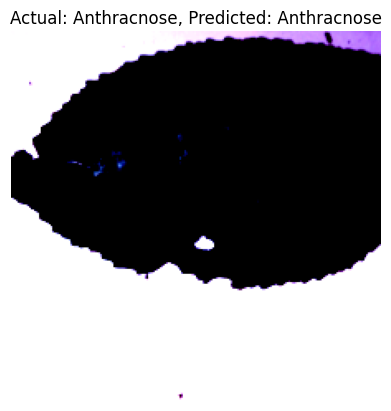

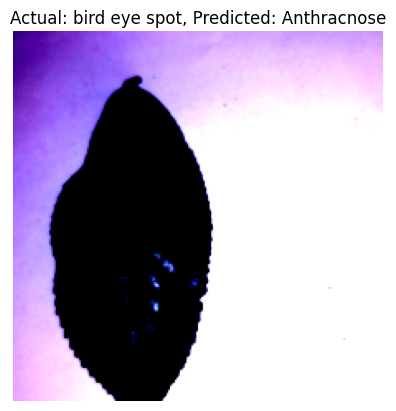

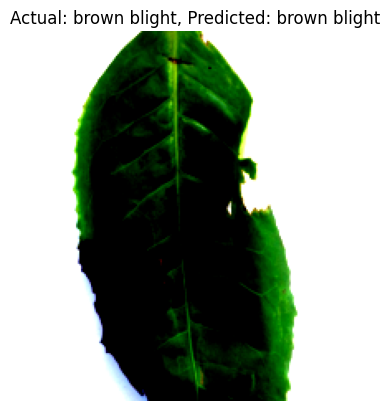

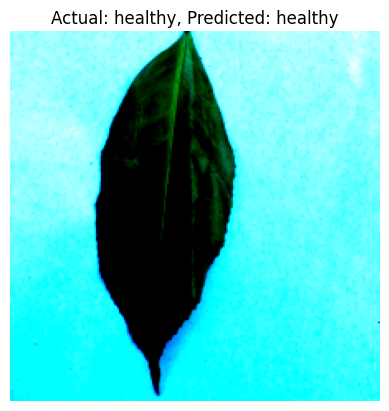

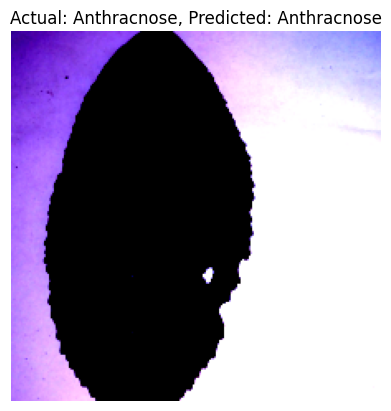

Total Accuracy: 85.00%


In [ ]:
# Test the model with visualization and total accuracy
print("Testing the model with visualization:")
test_model_visualize(model, test_loader, class_names)

In [ ]:
# Define the path where you want to save your model
model_path = '/content/drive/My Drive/tea_vgg16_v1.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print("Model saved successfully.")


Model saved successfully.


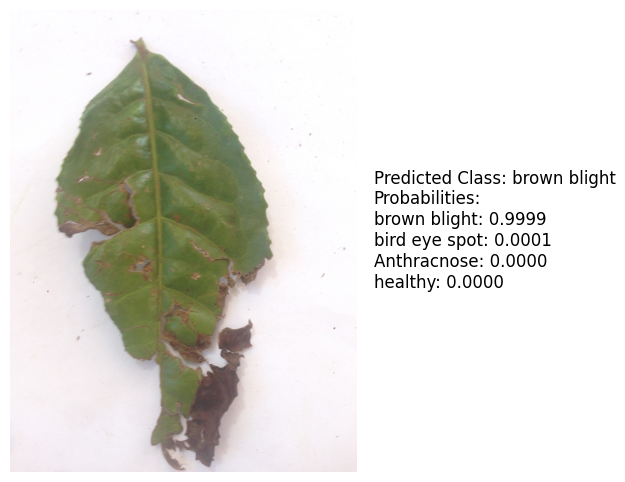

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the function to load the model
def load_model(model_path):
    # Define the CNN architecture (assuming the same architecture as before)
    model = CNN()
    # Load the trained weights
    model.load_state_dict(torch.load(model_path))
    # Set the model to evaluation mode
    model.eval()
    return model

# Define the function to predict on a new image
def predict_image(model, image_path, class_names):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Predict the class probabilities
    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.softmax(outputs, dim=1)

    # Get the predicted class label
    _, predicted = torch.max(outputs, 1)
    predicted_label = class_names[predicted.item()]

    # Convert tensor probabilities to a list
    probabilities = probs.squeeze().tolist()

    # Visualize the image and predicted probabilities
    visualize_prediction(image, predicted_label, class_names, probabilities)

# Define the function to visualize the prediction
def visualize_prediction(image, predicted_class, class_names, probabilities):
    fig, ax = plt.subplots(figsize=(10, 6))

    # Display the image
    ax.imshow(image)
    ax.axis('off')

    # Create a text box on the right side for predicted class and probabilities
    text = f'Predicted Class: {predicted_class}\nProbabilities:\n'
    for class_name, prob in zip(class_names, probabilities):
        text += f'{class_name}: {prob:.4f}\n'
    ax.text(1.05, 0.5, text, verticalalignment='center', transform=ax.transAxes, fontsize=12)


    plt.show()

# Load the saved model
model_path = '/content/drive/My Drive/tea_cnn1.pth'
loaded_model = load_model(model_path)

# Define the class names
class_names = ["brown blight", "bird eye spot", "Anthracnose", "healthy"]  # Replace with your class names

# Path to the new image to be predicted
image_path = '/content/data/brown blight/UNADJUSTEDNONRAW_thumb_105.jpg'

# Predict on the new image and visualize
predict_image(loaded_model, image_path, class_names)


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Define the function to load the model
def load_model(model_path):
    # Define the CNN architecture (assuming the same architecture as before)
    model = CNN()
    # Load the trained weights
    model.load_state_dict(torch.load(model_path))
    # Set the model to evaluation mode
    model.eval()
    return model

# Define the function to predict on a new image
def predict_image(model, image_path, class_names):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

    # Predict the class probabilities
    with torch.no_grad():
        outputs = model(image_tensor)
        probs = torch.softmax(outputs, dim=1)

    # Get the predicted class label
    _, predicted = torch.max(outputs, 1)
    predicted_label = class_names[predicted.item()]

    # Convert tensor probabilities to a list
    probabilities = probs.squeeze().tolist()

    # Print the predicted class name and probabilities
    print("Predicted class:", predicted_label)
    for class_name, prob in zip(class_names, probabilities):
        print(f"Probability of {class_name}: {prob:.4f}")

# Load the saved model
model_path = '/content/drive/My Drive/tea_cnn1.pth'
loaded_model = load_model(model_path)

# Define the class names
class_names = ["brown blight", "bird eye spot", "Anthracnose", "healthy"]  # Replace with your class names

# Path to the new image to be predicted
image_path = '/content/data/brown blight/UNADJUSTEDNONRAW_thumb_105.jpg'

# Predict on the new image
predict_image(loaded_model, image_path, class_names)


Predicted class: brown blight
Probability of brown blight: 0.9999
Probability of bird eye spot: 0.0001
Probability of Anthracnose: 0.0000
Probability of healthy: 0.0000


In [4]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


In [5]:
!wget -q -O - ipv4.icanhazip.com

35.232.13.255


! streamlit run app.py & npx localtunnel --port 8501

In [ ]:
! streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 3.508s
your url is: https://ready-ears-think.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.232.13.255:8501

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:06<00:00, 89.6MB/s]
